In [1]:
#from google.colab import files
#uploaded = files.upload()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'svg'

In [3]:
raw_df=pd.read_csv('Zomato Chennai Listing 2020.csv')
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


Basic information about the data set

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [5]:
print('the number of rows in the dataset',raw_df.shape[0])
print('the number of columns in the dataset',raw_df.shape[1])

the number of rows in the dataset 12032
the number of columns in the dataset 12


In [6]:
raw_df.dtypes

Zomato URL                object
Name of Restaurant        object
Address                   object
Location                  object
Cuisine                   object
Top Dishes                object
Price for 2              float64
Dining Rating             object
Dining Rating Count       object
Delivery Rating           object
Delivery Rating Count     object
Features                  object
dtype: object

In [7]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [8]:
raw_df.describe()

,Price for 2
count,12032.000000
mean,397.611370
std,332.045938
min,40.000000
25%,200.000000
50%,300.000000
75%,450.000000
max,5000.000000


In [9]:
raw_df.fillna('0',inplace=True)

In [10]:
raw_df.head(20)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
5,https://www.zomato.com/chennai/dine-n-fun-meda...,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, S...",Medavakkam,"['South Indian', ' North Indian', ' Chinese']","['Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450.0,4.1,567,3.8,24700,"['Home Delivery', 'Indoor Seating']"
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,None,Does not offer Dining,4.3,1061,['Home Delivery']
7,https://www.zomato.com/chennai/cafe-arabica-an...,Cafe Arabica,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"['Cafe', ' Fast Food']","['Burgers', ' Pasta', ' Sandwich', ' Strawberr...",800.0,4.3,668,4.3,4320,"['Breakfast', 'Home Delivery', 'Indoor Seating..."
8,https://www.zomato.com/chennai/savoury-sea-she...,Savoury Sea Shell,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"['Arabian', ' Chinese', ' North Indian', ' Leb...","['Shawarma', ' Chicken Grill', ' Brownie', ' S...",1400.0,4.2,2564,4.1,21700,"['Home Delivery', 'Indoor Seating', 'Card Upon..."
9,https://www.zomato.com/chennai/sangeetha-veg-r...,Sangeetha Veg Restaurant,"102/82, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"['South Indian', ' North Indian', ' Chinese', ...","['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...",800.0,4.4,1578,4.2,39600,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."


Data Preprocessing

In [11]:
raw_df.isnull().sum()

Zomato URL               0
Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [12]:
raw_df.replace(to_replace=['None','Does not offer Dining','Not enough Delivery Reviews','Does not offer Delivery',
                                'Not enough Dining Reviews'],value='0',inplace=True)
raw_df.head(20)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"
5,https://www.zomato.com/chennai/dine-n-fun-meda...,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, S...",Medavakkam,"['South Indian', ' North Indian', ' Chinese']","['Chicken Grill', ' Shawarma', ' Naan', ' Chic...",450.0,4.1,567,3.8,24700,"['Home Delivery', 'Indoor Seating']"
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350.0,0,0,4.3,1061,['Home Delivery']
7,https://www.zomato.com/chennai/cafe-arabica-an...,Cafe Arabica,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"['Cafe', ' Fast Food']","['Burgers', ' Pasta', ' Sandwich', ' Strawberr...",800.0,4.3,668,4.3,4320,"['Breakfast', 'Home Delivery', 'Indoor Seating..."
8,https://www.zomato.com/chennai/savoury-sea-she...,Savoury Sea Shell,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"['Arabian', ' Chinese', ' North Indian', ' Leb...","['Shawarma', ' Chicken Grill', ' Brownie', ' S...",1400.0,4.2,2564,4.1,21700,"['Home Delivery', 'Indoor Seating', 'Card Upon..."
9,https://www.zomato.com/chennai/sangeetha-veg-r...,Sangeetha Veg Restaurant,"102/82, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"['South Indian', ' North Indian', ' Chinese', ...","['Filtered Coffee', ' Chaat', ' Faluda', ' Mas...",800.0,4.4,1578,4.2,39600,"['Breakfast', 'Home Delivery', 'Vegetarian Onl..."


In [13]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null object
Dining Rating Count      12032 non-null object
Delivery Rating          12032 non-null object
Delivery Rating Count    12032 non-null object
Features                 12032 non-null object
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [14]:
#Changing the datatypes of numerical columns
raw_df['Dining Rating']=raw_df['Dining Rating'].astype('float64')
raw_df['Dining Rating Count']=raw_df['Dining Rating Count'].astype('int64')
raw_df['Delivery Rating']=raw_df['Delivery Rating'].astype('float64')
raw_df['Delivery Rating Count']=raw_df['Delivery Rating'].astype('int64')

In [15]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
Zomato URL               12032 non-null object
Name of Restaurant       12032 non-null object
Address                  12032 non-null object
Location                 12032 non-null object
Cuisine                  12032 non-null object
Top Dishes               12032 non-null object
Price for 2              12032 non-null float64
Dining Rating            12032 non-null float64
Dining Rating Count      12032 non-null int64
Delivery Rating          12032 non-null float64
Delivery Rating Count    12032 non-null int64
Features                 12032 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 1.1+ MB


Working with Time format

In [16]:
raw_df['Cuisine'].value_counts()

['South Indian']                                                              883
['Fast Food']                                                                 295
['Bakery']                                                                    266
['South Indian', ' Chinese']                                                  233
['Biryani']                                                                   225
                                                                             ... 
['North Indian', ' Chinese', ' Biryani', ' Mughlai']                            1
['Continental', ' Mexican', ' North Indian']                                    1
['North Indian', ' Mughlai', ' Chettinad', ' Desserts']                         1
['Bakery', ' Fast Food', ' Sandwich', ' Rolls', ' Beverages', ' Desserts']      1
['South Indian', ' Burger', ' Sandwich', ' Fast Food', ' Beverages']            1
Name: Cuisine, Length: 2423, dtype: int64

In [17]:
#Cusinie
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace('[','')
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace(']','')
raw_df['Cuisine'] = raw_df['Cuisine'].str.replace("'",'')
raw_df.head(20)
#Top Dishes
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace('[','')
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace(']','')
raw_df['Top Dishes'] = raw_df['Top Dishes'].str.replace("'",'')
raw_df.head(20)
#Features
raw_df['Features'] = raw_df['Features'].str.replace('[','')
raw_df['Features'] = raw_df['Features'].str.replace(']','')
raw_df['Features'] = raw_df['Features'].str.replace("'",'')
raw_df.head(20)

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,4,"Home Delivery, Indoor Seating"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,4,"Home Delivery, Free Parking, Table booking rec..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,4,"Home Delivery, Indoor Seating"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,4,"Home Delivery, Free Parking, Card Upon Deliver..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,4,"Home Delivery, Indoor Seating"
5,https://www.zomato.com/chennai/dine-n-fun-meda...,Dine N Fun,"Opposite Forest Office, Tambaram Main Road, S...",Medavakkam,"South Indian, North Indian, Chinese","Chicken Grill, Shawarma, Naan, Chicken Butt...",450.0,4.1,567,3.8,3,"Home Delivery, Indoor Seating"
6,https://www.zomato.com/chennai/bai-veetu-kalya...,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,Biryani,"Bread Halwa, Mutton Biryani, Brinjal Gravy, ...",350.0,0.0,0,4.3,4,Home Delivery
7,https://www.zomato.com/chennai/cafe-arabica-an...,Cafe Arabica,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"Cafe, Fast Food","Burgers, Pasta, Sandwich, Strawberry Mojito...",800.0,4.3,668,4.3,4,"Breakfast, Home Delivery, Indoor Seating, Dess..."
8,https://www.zomato.com/chennai/savoury-sea-she...,Savoury Sea Shell,"3, E Block, 3rd Avenue, Anna Nagar East, Chennai",Anna Nagar East,"Arabian, Chinese, North Indian, Lebanese, ...","Shawarma, Chicken Grill, Brownie, Sea Food,...",1400.0,4.2,2564,4.1,4,"Home Delivery, Indoor Seating, Card Upon Deliv..."
9,https://www.zomato.com/chennai/sangeetha-veg-r...,Sangeetha Veg Restaurant,"102/82, GN Chetty Road, T. Nagar, Chennai",T. Nagar,"South Indian, North Indian, Chinese, Chetti...","Filtered Coffee, Chaat, Faluda, Masala Dosa...",800.0,4.4,1578,4.2,4,"Breakfast, Home Delivery, Vegetarian Only, Ind..."


In [18]:
#Removing unwanted columns
raw_df.drop(['Zomato URL','Address'],axis=1,inplace=True)
raw_df.head(20)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,4,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,4,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,4,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,4,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,4,"Home Delivery, Indoor Seating"
5,Dine N Fun,Medavakkam,"South Indian, North Indian, Chinese","Chicken Grill, Shawarma, Naan, Chicken Butt...",450.0,4.1,567,3.8,3,"Home Delivery, Indoor Seating"
6,Bai Veetu Kalyanam,Navallur,Biryani,"Bread Halwa, Mutton Biryani, Brinjal Gravy, ...",350.0,0.0,0,4.3,4,Home Delivery
7,Cafe Arabica,Anna Nagar East,"Cafe, Fast Food","Burgers, Pasta, Sandwich, Strawberry Mojito...",800.0,4.3,668,4.3,4,"Breakfast, Home Delivery, Indoor Seating, Dess..."
8,Savoury Sea Shell,Anna Nagar East,"Arabian, Chinese, North Indian, Lebanese, ...","Shawarma, Chicken Grill, Brownie, Sea Food,...",1400.0,4.2,2564,4.1,4,"Home Delivery, Indoor Seating, Card Upon Deliv..."
9,Sangeetha Veg Restaurant,T. Nagar,"South Indian, North Indian, Chinese, Chetti...","Filtered Coffee, Chaat, Faluda, Masala Dosa...",800.0,4.4,1578,4.2,4,"Breakfast, Home Delivery, Vegetarian Only, Ind..."


In [19]:
#Removing duplicates
raw_df[raw_df.duplicated()]
#raw_df[raw_df.duplicated()]

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
9103,Brownie Heaven,T. Nagar,"Bakery, Desserts, Beverages",Invalid,350.0,0.0,0,0.0,0,"Home Delivery, Indoor Seating, Desserts and Bakes"
9995,ibaco,Kanchipuram District,Ice Cream,Invalid,200.0,0.0,0,0.0,0,"Home Delivery, Vegetarian Only, Indoor Seating..."
10534,Cake Waves,Thiruvallur,"Bakery, Fast Food",Invalid,500.0,0.0,0,0.0,0,"Home Delivery, Indoor Seating, Desserts and Bakes"
11225,Pizza Square,Thiruvanmiyur,"Pizza, Fast Food",Invalid,300.0,0.0,0,0.0,0,"Home Delivery, Indoor Seating"
11361,Aavin Parlour,George Town,Ice Cream,Invalid,200.0,0.0,0,0.0,0,"Takeaway Only, Desserts and Bakes"
11390,The Cake Point,Mogappair,Bakery,Invalid,200.0,0.0,0,0.0,0,"Home Delivery, Indoor Seating, Desserts and Bakes"
11489,Parantha Pundit,Mogappair,"North Indian, Beverages",Invalid,200.0,0.0,0,0.0,0,Delivery Only
11496,Parantha Pundit,Kovalam,"North Indian, Beverages",Invalid,200.0,0.0,0,0.0,0,Delivery Only
11553,Leo Coffee,Mylapore,"Coffee, Tea, Beverages",Invalid,250.0,0.0,0,0.0,0,Home Delivery
11572,Leo Coffee,Anna Nagar East,"Coffee, Tea, Beverages",Invalid,250.0,0.0,0,0.0,0,"Takeaway Only, Vegetarian Only"


In [20]:
dir(raw_df)

['Cuisine',
 'Features',
 'Location',
 'T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduc

In [21]:
raw_df.drop_duplicates(inplace=True)
raw_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,4,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,4,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,4,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,4,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,4,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12028,CK's Sandwiches,Kolathur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12029,CK's Sandwiches,Anna Nagar East,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"
12030,CK's Sandwiches,Ramapuram,Sandwich,Invalid,350.0,0.0,0,0.0,0,"Breakfast, Delivery Only"


In [22]:
chennai=raw_df.copy()
chennai.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,4,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,4,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,4,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,4,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,4,"Home Delivery, Indoor Seating"


In [23]:
! pip install -U plotly kaleido

# What are the top locations in Chennai with the highest number of restaurants?

In [24]:
top_location_df=chennai.groupby(by='Location').agg({'Name of Restaurant':'count'}).rename(columns={'Name of Restaurant':'Count of Restaurants'}).reset_index()
top_location_df=top_location_df.sort_values(by='Count of Restaurants',ascending=False).head(25)
top_location_df.head()

,Location,Count of Restaurants
186,Porur,415
257,Velachery,372
10,Ambattur,328
219,T. Nagar,314
182,Perungudi,288


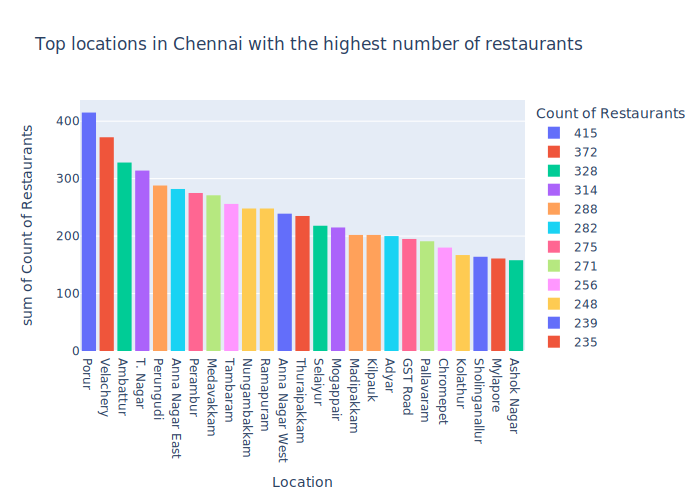

In [25]:
fig=px.histogram(top_location_df,x='Location',y='Count of Restaurants',color='Count of Restaurants',title='Top locations in Chennai with the highest number of restaurants',
                )
fig.show()

#  What are the percentage of restaurants by Delivery Rating Type in chennai?

In [87]:
rating_type=chennai['Delivery Rating'].value_counts().reset_index()
rating_type.rename(columns={'index':'Delivery Rating','Delivery Rating':'Count of restaurants'},inplace=True)
rating_type.head()

,Delivery Rating,Count of restaurants
0,0.0,5807
1,3.9,1383
2,3.8,701
3,4.0,570
4,3.7,559


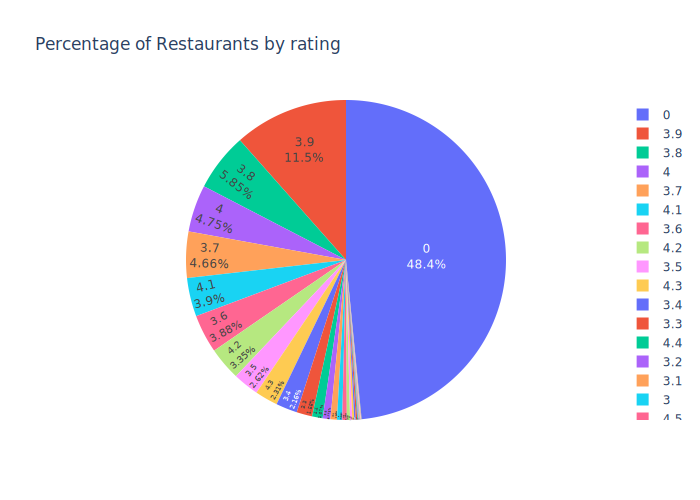

In [27]:
fig=px.pie(rating_type,names='Delivery Rating',values='Count of restaurants',color='Delivery Rating',
          title='Percentage of Restaurants by rating').update_traces(textposition='inside',textinfo='percent+label')
fig.show()

# What are the percentage of restaurants by Delivery Dining Type in chennai?

In [88]:
rating_dine_type=chennai['Delivery Rating'].value_counts().reset_index()
rating_dine_type.rename(columns={'index':'Delivery Rating','Delivery Rating':'Count of restaurants'},inplace=True)
rating_dine_type.head()

,Delivery Rating,Count of restaurants
0,0.0,5807
1,3.9,1383
2,3.8,701
3,4.0,570
4,3.7,559


#  Top rated restaurants which has south Indian Cusine based on Dining rating

In [28]:
south_df=chennai[chennai['Cuisine'].str.contains('South Indian')]
south_df=south_df.sort_values(by='Dining Rating',ascending=False)
south_df.head(5)

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
219,Prems Graama Bhojanam,Adyar,South Indian,"Benne Dosa, Buttermilk, Thatte Idli, Kulfi,...",500.0,4.9,1511,4.1,4,"Home Delivery, Vegetarian Only, Indoor Seating..."
184,Gossip Fusion Bistro,Kanathur,"Italian, Continental, Burger, Sandwich, Wr...","Tender Coconut Mousse, Iced Tea, Pasta, Piz...",1500.0,4.9,996,4.3,4,"Breakfast, Home Delivery, Free Parking, Table ..."
443,Avartana - ITC Grand Chola,"ITC Grand Chola, Guindy","South Indian, Chinese, Desserts","Chole, Carrot Ice Cream, Dumplings, Wine, ...",4500.0,4.8,371,0.0,0,"Full Bar Available, Table reservation required..."
187,J.Hind - Grand by GRT Hotels,Grand by GRT Hotels,"North Indian, Mughlai, South Indian","Biryani, Momos, Coconut Pudding, Set Menu, ...",2500.0,4.7,1138,0.0,0,"Full Bar Available, 4/5 Star, Table reservatio..."
24,Eating Circles,Alwarpet,South Indian,"Rose Milk, Neer Dosa, Thatte Idli, Open Mas...",250.0,4.7,782,4.2,4,"Breakfast, Home Delivery, Vegetarian Only, Ind..."


# Which are the Top 10 highest rated Seafood Restaurant in Chennai?

In [29]:
seafood_df=chennai[chennai['Cuisine'].str.contains('Seafood')]
seafood_df=seafood_df.sort_values(by='Dining Rating',ascending=False).head(10)
seafood_df

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
195,The Marina,Nungambakkam,"Seafood, North Indian, Chinese","Sea Food, Jumbo Prawns, Biryani, Fish Mango...",1600.0,4.8,1082,4.3,4,"Home Delivery, Indoor Seating, Table reservati..."
292,Alchemy Bar & Lounge,"Hotel Rajpark, Alwarpet","Continental, Finger Food, Seafood, Fast Food","Cocktails, Fries, Brownie, Peri Peri Chicke...",2000.0,4.5,432,0.0,0,"Full Bar Available, Live Sports Screening, Spo..."
214,Sera - The Tapas Bar & Restaurant,Gopalapuram,"Finger Food, Seafood, Italian, Continental","Cocktails, Pasta, Nachos, Mashed Potato, S...",1600.0,4.5,964,3.4,3,"Home Delivery, Full Bar Available, Free Parkin..."
358,The Wharf 2.0 - Radisson BLU Templebay,"Radisson Blu Temple Bay, Mamallapuram","Seafood, Mediterranean, Italian, North Indian","Sea Food, Jumbo Prawns, Pasta, Fish, Prawn...",3000.0,4.4,517,0.0,0,"Wheelchair Accessible, Full Bar Available, Ind..."
342,L'attitude 49,Grande Bay Resort,"Singaporean, Thai, Asian, Chinese, Contine...","Sea Food, Fish, Pasta, Noodle, Biryani, D...",1800.0,4.4,563,0.0,0,"Breakfast, Wheelchair Accessible, Full Bar Ava..."
315,Layalee,Ekkaduthangal,"Arabian, BBQ, Seafood, Chinese, Continenta...","Fish, Faluda, Shawarma, Brownie, Mutton Bi...",700.0,4.4,586,4.1,4,"Home Delivery, Table booking recommended, Indo..."
282,Bay View - Taj Fisherman's Cove Resort & Spa,"Taj Fisherman's Cove Resort & Spa, Kanchipuram...","Seafood, South Indian, Andhra, Kerala","Sea Food, Fish Curry, Chips, Cocktails, Lo...",3500.0,4.4,678,0.0,0,"Wheelchair Accessible, Full Bar Available, 4/5..."
96,Urban Spatula,Anna Nagar West,"Continental, Seafood, Biryani, Italian, No...","Burgers, Pasta, Fish, Fries, Chips, Salad...",800.0,4.4,794,4.3,4,"Home Delivery, Free Parking, Table booking rec..."
9028,Copper Kitchen,Velachery,"North Indian, Chinese, Chettinad, Seafood","Biryani, Faluda, Tandoori Chicken, Paratha,...",1000.0,4.3,814,3.6,3,"Home Delivery, Lunch Menu, Valet Parking Avail..."
9027,Copper Kitchen,Kotturpuram,"North Indian, Chinese, Chettinad, Seafood","Brownie, Faluda, Biryani, Bbq Chicken, Sha...",1000.0,4.3,1739,3.7,3,"Home Delivery, Indoor Seating, Table booking r..."


# Which places have the highest rated restaurant for each Cuisine Type in chennai?

In [30]:
highest_rated=chennai[chennai['Delivery Rating']>=4.5]
highest_rated=highest_rated.sort_values(by='Delivery Rating',ascending=False)
highest_rated

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
9977,ibaco,Mylapore,Ice Cream,Brownie,200.0,3.6,55,4.7,4,"Home Delivery, Vegetarian Only, Desserts and B..."
3301,Mo Thickshake And Snackers,Vadapalani,Beverages,Invalid,300.0,0.0,0,4.7,4,Home Delivery
4371,Mumbai Kulfi,Pallavaram,Desserts,Invalid,150.0,3.7,11,4.7,4,"Home Delivery, Free Parking, Outdoor Seating, ..."
1985,Arabian Plate,Adambakkam,"Arabian, Biryani",Invalid,300.0,3.7,58,4.7,4,"Home Delivery, Indoor Seating"
11767,Green Crush,Alwarpet,Beverages,Invalid,200.0,0.0,0,4.6,4,"Home Delivery, Vegetarian Only"
...,...,...,...,...,...,...,...,...,...,...
78,Shri Rajasthani Dhaba,Anna Nagar West,"Rajasthani, North Indian","Rajasthani Thali, Buttermilk, Roti, Paratha...",500.0,4.5,983,4.5,4,"Home Delivery, Vegetarian Only, Indoor Seating..."
9051,A2B - Adyar Ananda Bhavan,T. Nagar,"Mithai, Street Food, Fast Food, Ice Cream","Coffee, Pav Bhaji, Chaat, Cheese Sandwich, ...",300.0,3.0,153,4.5,4,"Breakfast, Home Delivery, Indoor Seating, Tabl..."
9086,Brownie Heaven,Thiruvanmiyur,"Desserts, Bakery","Nutella Brownie, Ice Cream Sandwich, Tiramis...",350.0,0.0,0,4.5,4,"Home Delivery, Desserts and Bakes"
9089,Brownie Heaven,Egmore,"Bakery, Desserts, Beverages",Brownie Chocolate,350.0,3.9,46,4.5,4,"Home Delivery, Indoor Seating, Desserts and Bakes"


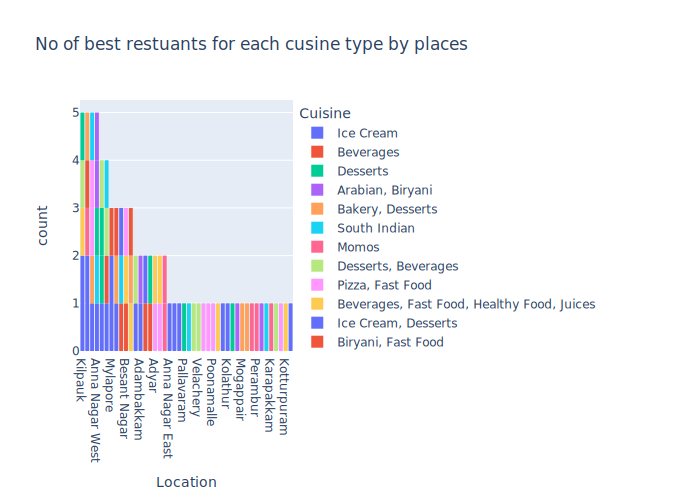

In [31]:
fig=px.histogram(highest_rated,x='Location',color='Cuisine',
                title='No of best restuants for each cusine type by places').update_xaxes(categoryorder="total descending")
fig.show()

# What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [32]:
best_df=highest_rated.groupby(by=['Cuisine'])['Price for 2'].mean().reset_index()
best_df.rename(columns={'Price for 2':'Average Price'})
best_df.head()

,Cuisine,Price for 2
0,"Arabian, Biryani",300.0
1,BBQ,400.0
2,Bakery,325.0
3,"Bakery, Coffee",500.0
4,"Bakery, Desserts",300.0


# Which areas have a large number of Chinese Restaurant Market?

In [33]:
chinese_df=chennai[chennai['Cuisine'].str.contains('Chinese')]
chinese_df.head()

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,4,"Home Delivery, Indoor Seating"
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,4,"Home Delivery, Indoor Seating"
5,Dine N Fun,Medavakkam,"South Indian, North Indian, Chinese","Chicken Grill, Shawarma, Naan, Chicken Butt...",450.0,4.1,567,3.8,3,"Home Delivery, Indoor Seating"
8,Savoury Sea Shell,Anna Nagar East,"Arabian, Chinese, North Indian, Lebanese, ...","Shawarma, Chicken Grill, Brownie, Sea Food,...",1400.0,4.2,2564,4.1,4,"Home Delivery, Indoor Seating, Card Upon Deliv..."
9,Sangeetha Veg Restaurant,T. Nagar,"South Indian, North Indian, Chinese, Chetti...","Filtered Coffee, Chaat, Faluda, Masala Dosa...",800.0,4.4,1578,4.2,4,"Breakfast, Home Delivery, Vegetarian Only, Ind..."


In [34]:
chinese_area=chinese_df.groupby(by='Location').agg({'Name of Restaurant':'count'})
chinese_area=chinese_area.rename(columns={'Location':'Area','Name of Restaurant':'Count of Restaurant'})
chinese_area=chinese_area.sort_values(by='Count of Restaurant',ascending=False)
chinese_area.head()

,Count of Restaurant
Location,
Porur,131
Ambattur,115
Velachery,102
Perambur,99
Perungudi,93


# What are the most common cuisines in Chennai?

In [35]:
common_df=chennai['Cuisine'].value_counts().reset_index()
common_df=common_df.rename(columns={'index':'Cusine','Cuisine':'count'})
common_df=common_df.sort_values(by='count',ascending=False).head(10)
common_df
# South Indian is the most common cuisine in chennai

,Cusine,count
0,South Indian,862
1,Fast Food,295
2,Bakery,265
3,"South Indian, Chinese",233
4,Biryani,225
5,Chinese,218
6,Ice Cream,196
7,"North Indian, Chinese",195
8,North Indian,186
9,"Fast Food, Beverages",177


# What is the distribution of prices among highly-rated restaurants (4.0 and above)?

In [36]:
highest_rated=chennai[(chennai['Dining Rating']>=4.0) & (chennai['Delivery Rating']>=4.0)]
highest_rated

,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,4,"Home Delivery, Indoor Seating"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,4,"Home Delivery, Free Parking, Table booking rec..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,4,"Home Delivery, Indoor Seating"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,4,"Home Delivery, Free Parking, Card Upon Deliver..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,4,"Home Delivery, Indoor Seating"
...,...,...,...,...,...,...,...,...,...,...
9960,Ibaco,Chromepet,Ice Cream,Icecream Cake,200.0,4.0,109,4.1,4,"Home Delivery, Vegetarian Only, Indoor Seating..."
10028,Creamy Inn,Anna Nagar West,"Ice Cream, Desserts, Beverages","Waffles, Thick Shakes",250.0,4.1,224,4.0,4,"Home Delivery, Vegetarian Only, Indoor Seating..."
10063,Cold Stone Creamery,Akkarai,"Desserts, Ice Cream",Invalid,500.0,4.1,169,4.1,4,"Home Delivery, Vegetarian Only, Indoor Seating..."
10066,Pizza Republic,Tambaram,Pizza,"Pizza, Garlic Bread, Salad, Pasta",500.0,4.1,209,4.0,4,"Home Delivery, Indoor Seating"


In [37]:
highest_average_df=highest_rated.groupby(['Location','Name of Restaurant','Dining Rating','Delivery Rating'])['Price for 2'].mean().reset_index(name='Average')
highest_average_df=highest_average_df.sort_values(['Dining Rating','Delivery Rating'],ascending=False)
highest_average_df

,Location,Name of Restaurant,Dining Rating,Delivery Rating,Average
380,West Mambalam,The Sandwich Shop,4.9,4.4,300.0
3,Adyar,Bombay Kulfi,4.9,4.3,200.0
127,Egmore,Kabab Corner,4.9,4.3,450.0
162,Kanathur,Gossip Fusion Bistro,4.9,4.3,1500.0
297,Royapettah,Brownie Heaven,4.9,4.3,350.0
...,...,...,...,...,...
343,Teynampet,Ox & Tomato,4.0,4.0,850.0
351,Thousand Lights,Lassi Shop,4.0,4.0,200.0
359,Vandalur,Ambrocia's,4.0,4.0,400.0
366,Velachery,Kings Kulfi & Natural Ice Cream,4.0,4.0,300.0


# What are the most common features offered by restaurants (e.g., home delivery, table booking)?

In [47]:
common_feature=chennai['Features'].value_counts().reset_index()
common_feature=common_feature.rename(columns={'index':'Features','Features':'Count'})
common_feature=common_feature.sort_values(by='Count',ascending=False)
common_feature.head(10)

,Features,Count
0,"[Home Delivery, Indoor Seating]",2446
1,[Delivery Only],951
2,[Home Delivery],758
3,[Indoor Seating],569
4,"[Breakfast, Home Delivery, Indoor Seating]",485
5,"[Home Delivery, Indoor Seating, Desserts and...",380
6,"[Home Delivery, Free Parking, Indoor Seating]",283
7,"[Breakfast, Indoor Seating]",250
8,"[Breakfast, Home Delivery, Vegetarian Only, ...",237
9,"[Breakfast, Home Delivery]",171


,Name of Restaurant,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,Pallavaram,Biryani,"Bread Halwa, Chicken 65, Mutton Biryani, Ch...",500.0,4.3,1500,4.3,4,"[Home Delivery, Indoor Seating]"
1,Sukkubhai Biriyani,Alandur,"Biryani, North Indian, Mughlai, Desserts, ...","Beef Biryani, Beef Fry, Paratha, Paya, Bri...",1000.0,4.4,3059,4.1,4,"[Home Delivery, Free Parking, Table booking ..."
2,SS Hyderabad Biryani,Kodambakkam,"Biryani, North Indian, Chinese, Arabian","Brinjal Curry, Tandoori Chicken, Chicken Gri...",500.0,4.3,1361,4.4,4,"[Home Delivery, Indoor Seating]"
3,KFC,Perambur,"Burger, Fast Food, Finger Food, Beverages",Zinger Burger,500.0,4.0,1101,4.0,4,"[Home Delivery, Free Parking, Card Upon Deli..."
4,Tasty Kitchen,Perambur,"Chinese, Biryani, North Indian, Chettinad, ...","Mutton Biryani, Chicken Rice, Tomato Rice, ...",450.0,4.2,617,4.1,4,"[Home Delivery, Indoor Seating]"
...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Porur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"[Breakfast, Delivery Only]"
12028,CK's Sandwiches,Kolathur,Sandwich,Invalid,350.0,0.0,0,0.0,0,"[Breakfast, Delivery Only]"
12029,CK's Sandwiches,Anna Nagar East,Sandwich,Invalid,350.0,0.0,0,0.0,0,"[Breakfast, Delivery Only]"
12030,CK's Sandwiches,Ramapuram,Sandwich,Invalid,350.0,0.0,0,0.0,0,"[Breakfast, Delivery Only]"


# Find the list of Affordable Restaurants?

In [54]:
max_price=chennai['Price for 2'].max()
one_fourth=max_price/4
one_fourth

1250.0

In [57]:
afford_rest_df=chennai[['Name of Restaurant','Location','Cuisine','Price for 2']]
afford_rest_df=afford_rest_df[afford_rest_df['Price for 2']<=one_fourth]
afford_rest_df=afford_rest_df.sort_values(by='Price for 2',ascending=True)
afford_rest_df

,Name of Restaurant,Location,Cuisine,Price for 2
4685,Soda Hub,"OMR Food Street, Navallur",Beverages,40.0
7405,Indian Coffee House,Vepery,"Beverages, Juices",50.0
6854,Planet Soda,"OMR Food Street, Kandanchavadi","Beverages, Juices",50.0
8355,Kaafemaa,Ambattur,Beverages,50.0
1448,Mamee Soup,West Mambalam,Healthy Food,60.0
...,...,...,...,...
4595,Ramba Bar - Hotel Palmgrove,"Hotel Palmgrove, Nungambakkam",Finger Food,1200.0
473,Dynasty,"Harrisons Hotel, Nungambakkam","Chinese, Seafood",1200.0
343,D Cafe,T. Nagar,"Cafe, European, Chinese",1200.0
3179,Lava Bar at Metro Grand Hotel,Arumbakkam,Bar Food,1200.0


In [62]:
#Highly rated
oh_high=chennai[['Name of Restaurant','Location','Cuisine','Price for 2','Dining Rating']]
oh_high=oh_high[(oh_high['Dining Rating']>=4.0)]
oh_high=oh_high.sort_values(by=['Dining Rating'],ascending=True)
oh_high

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating
11035,Uzo Sandwiches,Potheri,"Sandwich, Burger, Wraps, Fast Food, Beverages",300.0,4.0
570,Massbunk Restaurant,"Massbunk Complex, Purasavakkam",Fast Food,500.0,4.0
569,Hungry Cars,Egatoor,"Asian, Cafe, South Indian, Kebab, Chinese,...",800.0,4.0
566,High on Grills,Anna Nagar West,"North Indian, Mughlai",850.0,4.0
1687,Pulp Fiction,"Massbunk Complex, Purasavakkam","Beverages, Fast Food",300.0,4.0
...,...,...,...,...,...
192,Kabab Corner,Egmore,"Kebab, Rolls, Mughlai",450.0,4.9
105,Bhangra,"Mayajaal Multiplex, Kanathur",North Indian,800.0,4.9
219,Prems Graama Bhojanam,Adyar,South Indian,500.0,4.9
155,The Sandwich Shop,West Mambalam,"Sandwich, Fast Food, Beverages",300.0,4.9


In [72]:
# To Merge the affordable highly rated data sets
best_rest=pd.merge(afford_rest_df,oh_high,how='inner',on=['Name of Restaurant','Location'])
best_rest=best_rest[['Name of Restaurant','Location','Cuisine_x','Price for 2_x','Dining Rating']]
best_rest.rename(columns={'Name of Restaurant':'Name of Restaurant','Location':'Location',
                                    'Cuisine_x':'Cuisine','Price for 2_x':'Price'},inplace=True)


In [73]:
best_rest

,Name of Restaurant,Location,Cuisine,Price,Dining Rating
0,Mamee Soup,West Mambalam,Healthy Food,60.0,4.1
1,Jannal Kadai,Mylapore,South Indian,100.0,4.0
2,Gaurav Vada Pav Centre,Perungudi,Street Food,100.0,4.2
3,90ML,Nungambakkam,"Tea, Coffee",100.0,4.0
4,Rayar's Mess,Mylapore,South Indian,100.0,4.7
...,...,...,...,...,...
764,Grill Box - Unlimited BBQ,Mylapore,"North Indian, South Indian, BBQ, Desserts",1200.0,4.4
765,Delhi Highway,Nungambakkam,"North Indian, Street Food",1200.0,4.2
766,The Roof Top Lounge,"Ramada Plaza, Guindy","BBQ, North Indian, Continental",1200.0,4.0
767,Dynasty,"Harrisons Hotel, Nungambakkam","Chinese, Seafood",1200.0,4.2


# Find the list of most Reliable Restaurants?

In [75]:
mean_votes=chennai['Dining Rating Count'].mean()
mean_votes

75.43752085418753

In [78]:
high_counts=chennai[['Name of Restaurant','Location','Cuisine','Price for 2','Dining Rating','Dining Rating Count']]
high_counts=high_counts[(high_counts['Dining Rating Count']>=mean_votes)]
high_counts=high_counts.sort_values(by=['Dining Rating Count'],ascending=True)
high_counts

,Name of Restaurant,Location,Cuisine,Price for 2,Dining Rating,Dining Rating Count
9749,The Belgian Waffle Co.,Anna Nagar West,"Desserts, Beverages, Fast Food",300.0,3.8,76
1827,Arun Home Mess,Velachery,South Indian,200.0,3.9,76
9146,Hotel Saravana Bhavan,Parrys,"North Indian, South Indian, Desserts, Bever...",550.0,3.5,76
1780,Rizwan,Triplicane,"North Indian, Chinese, Biryani",400.0,3.7,76
9071,A2B - Adyar Ananda Bhavan,Perambur,"Mithai, Street Food, Fast Food, Ice Cream",300.0,3.6,76
...,...,...,...,...,...,...
9026,Copper Kitchen,Porur,"North Indian, Chinese, Chettinad, Seafood",1000.0,4.3,5073
9030,Paradise Biryani,Perungudi,"Biryani, North Indian, Chinese",800.0,4.2,5317
74,Onesta,Semmancheri,"Pizza, Italian, Fast Food, Beverages, Dess...",600.0,4.4,5407
9233,Barbeque Nation,T. Nagar,"North Indian, Continental, Kebab, BBQ",1600.0,4.5,5821


In [85]:
best_reliable_rest=pd.merge(best_rest,high_counts,how='inner',on=['Name of Restaurant','Location'])
best_reliable_rest=best_reliable_rest[['Name of Restaurant','Location','Cuisine_x','Price','Dining Rating_x','Dining Rating Count','Dining Rating Count']]
best_reliable_rest.rename(columns={'Cuisine_x':'Cuisine','Dining Rating_x':'Dining Rating'},inplace=True)
best_reliable_rest

,Name of Restaurant,Location,Cuisine,Price,Dining Rating,Dining Rating Count,Dining Rating Count
0,Mamee Soup,West Mambalam,Healthy Food,60.0,4.1,115,115
1,Jannal Kadai,Mylapore,South Indian,100.0,4.0,153,153
2,Gaurav Vada Pav Centre,Perungudi,Street Food,100.0,4.2,188,188
3,90ML,Nungambakkam,"Tea, Coffee",100.0,4.0,173,173
4,Rayar's Mess,Mylapore,South Indian,100.0,4.7,904,904
...,...,...,...,...,...,...,...
865,Grill Box - Unlimited BBQ,Mylapore,"North Indian, South Indian, BBQ, Desserts",1200.0,4.4,2492,2492
866,Delhi Highway,Nungambakkam,"North Indian, Street Food",1200.0,4.2,1025,1025
867,The Roof Top Lounge,"Ramada Plaza, Guindy","BBQ, North Indian, Continental",1200.0,4.0,114,114
868,Dynasty,"Harrisons Hotel, Nungambakkam","Chinese, Seafood",1200.0,4.2,337,337
